Bikram Rumba

MSCS 634 - Advanced Big Data and Data Mining

Association Rule Mining with Apriori and FP-Growth

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


sns.set(style="whitegrid")
prior = pd.read_csv('order_products__prior.csv')
products = pd.read_csv('products.csv')
orders = pd.read_csv('orders.csv')
prior.head(), products.head(), orders.head()



(   order_id  product_id  add_to_cart_order  reordered
 0         2       33120                  1          1
 1         2       28985                  2          1
 2         2        9327                  3          0
 3         2       45918                  4          1
 4         2       30035                  5          0,
    product_id                                       product_name  aisle_id  \
 0           1                         Chocolate Sandwich Cookies        61   
 1           2                                   All-Seasons Salt       104   
 2           3               Robust Golden Unsweetened Oolong Tea        94   
 3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
 4           5                          Green Chile Anytime Sauce         5   
 
    department_id  
 0             19  
 1             13  
 2              7  
 3              1  
 4             13  ,
    order_id  user_id eval_set  order_number  order_dow  order_hour_of_d

In [4]:
data = prior.merge(products, on='product_id', how='left')
data.head()
data['product_name'] = data['product_name'].str.lower().str.strip()
data = data.dropna(subset=['product_name'])
data = data.drop_duplicates()
# Count how often each product appears
item_counts = data['product_name'].value_counts()

# Choose top N products to keep the matrix manageable
top_n = 50
top_items = item_counts.head(top_n).index

# Keep only rows with those products
filtered = data[data['product_name'].isin(top_items)]

filtered.head(), filtered.shape



(    order_id  product_id  add_to_cart_order  reordered  \
 1          2       28985                  2          1   
 5          2       17794                  6          1   
 12         3       21903                  4          1   
 30         5       13176                  1          1   
 33         5       27966                  4          1   
 
               product_name  aisle_id  department_id  
 1    michigan organic kale        83              4  
 5                  carrots        83              4  
 12    organic baby spinach       123              4  
 30  bag of organic bananas        24              4  
 33     organic raspberries       123              4  ,
 (5373545, 7))

In [5]:
basket = (
    filtered
    .groupby(['order_id', 'product_name'])['product_id']
    .count()
    .unstack()
    .fillna(0)
)

# Convert counts to 0/1
basket_bool = basket.applymap(lambda x: 1 if x > 0 else 0)

basket_bool.shape
basket_bool.head()


product_name,100% whole wheat bread,apple honeycrisp organic,asparagus,bag of organic bananas,banana,blueberries,carrots,cucumber kirby,fresh cauliflower,half & half,...,organic whole string cheese,organic yellow onion,organic zucchini,original hummus,raspberries,seedless red grapes,sparkling water grapefruit,spring water,strawberries,yellow onions
order_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


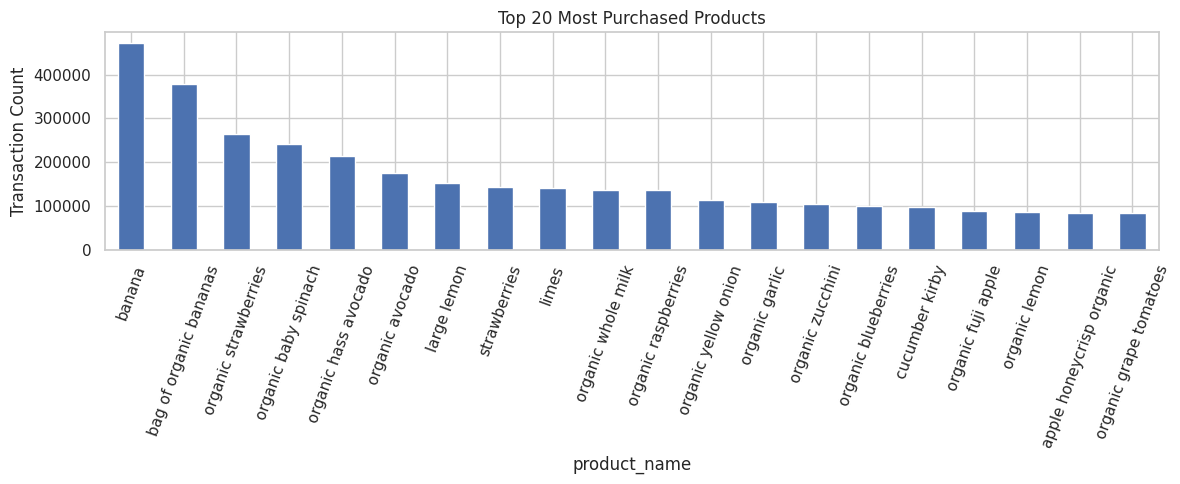

In [6]:
plt.figure(figsize=(12, 5))
item_counts.head(20).plot(kind='bar')
plt.title('Top 20 Most Purchased Products')
plt.ylabel('Transaction Count')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()


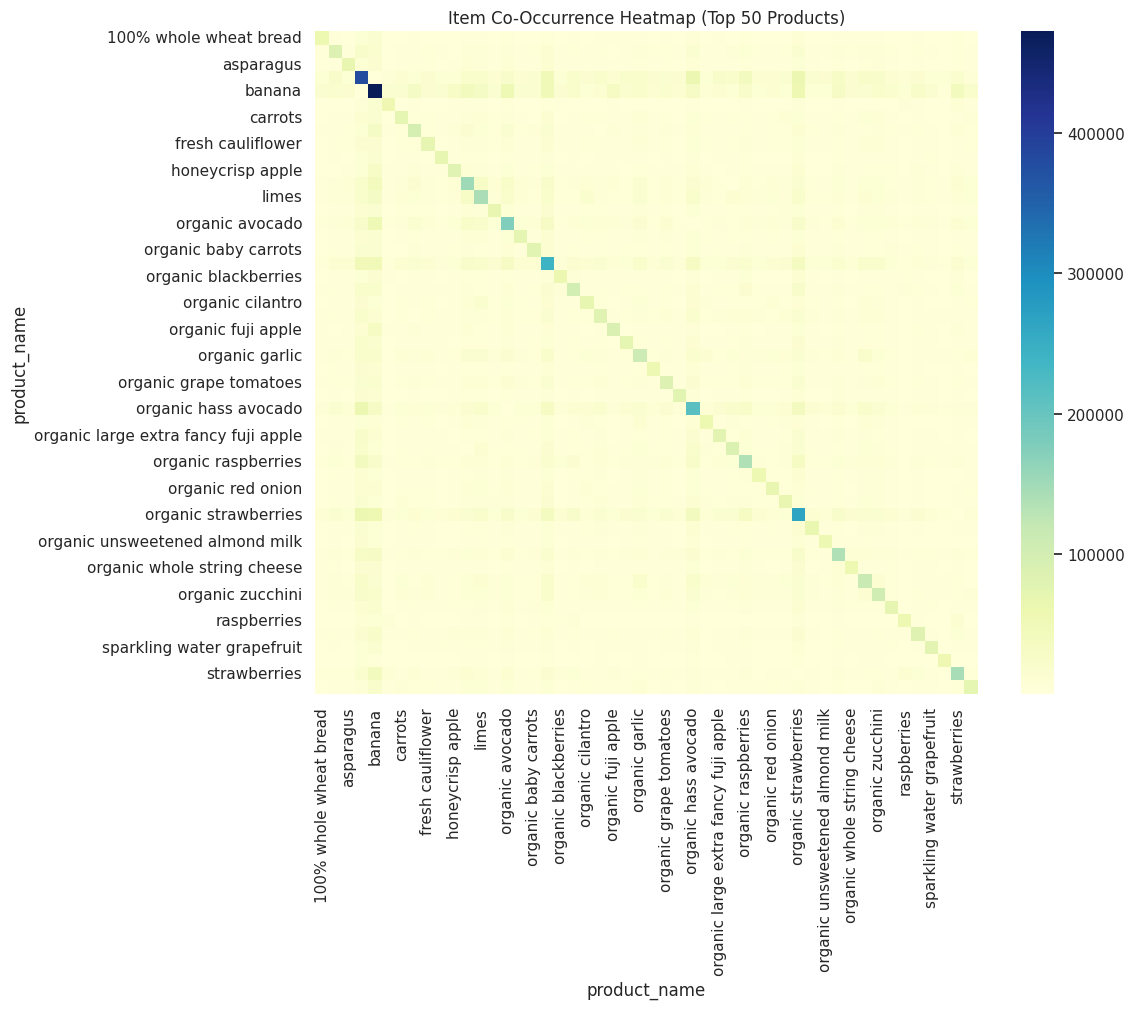

In [7]:
co_matrix = basket_bool.T.dot(basket_bool)

plt.figure(figsize=(12, 10))
sns.heatmap(co_matrix, cmap='YlGnBu', square=True)
plt.title('Item Co-Occurrence Heatmap (Top 50 Products)')
plt.tight_layout()
plt.show()


In [12]:
from mlxtend.frequent_patterns import apriori
import warnings

warnings.filterwarnings("ignore")
basket_sample = basket_bool.sample(n=50_000, random_state=42)

frequent_itemsets_ap = apriori(
    basket_sample,
    min_support=0.05,
    use_colnames=True,
    max_len=2
)

frequent_itemsets_ap.sort_values('support', ascending=False).head()



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,support,itemsets
1,0.22516,(banana)
0,0.17744,(bag of organic bananas)
9,0.12772,(organic strawberries)
5,0.11420,(organic baby spinach)
7,0.10292,(organic hass avocado)


<Figure size 1000x600 with 0 Axes>

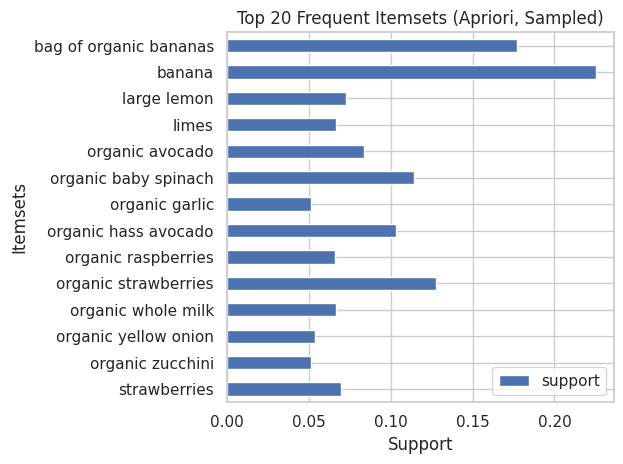

In [13]:
topN = 20
temp = frequent_itemsets_ap.copy()
temp['itemset_str'] = temp['itemsets'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(10,6))
temp.head(topN).plot(kind='barh', x='itemset_str', y='support')
plt.title(f"Top {topN} Frequent Itemsets (Apriori, Sampled)")
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [14]:
from mlxtend.frequent_patterns import fpgrowth
# If these are not defined, this will recreate them:
try:
    basket_sample
    min_support
except NameError:
    # Fallback: small sample and conservative support
    basket_sample = basket_bool.sample(n=50_000, random_state=42)
    min_support = 0.05  # adjust only if you get too few itemsets
frequent_itemsets_fp = fpgrowth(
    basket_sample,
    min_support=min_support,
    use_colnames=True,
    max_len=2          # only 1- and 2-item sets
)

frequent_itemsets_fp = frequent_itemsets_fp.sort_values('support', ascending=False)
frequent_itemsets_fp.head()


,support,itemsets
0,0.22516,(banana)
2,0.17744,(bag of organic bananas)
8,0.12772,(organic strawberries)
7,0.11420,(organic baby spinach)
3,0.10292,(organic hass avocado)


In [15]:
import time
from mlxtend.frequent_patterns import apriori, fpgrowth

# Time Apriori
start = time.time()
fi_ap = apriori(
    basket_sample,
    min_support=min_support,
    use_colnames=True,
    max_len=2
)
ap_time = time.time() - start

# Time FP-Growth
start = time.time()
fi_fp = fpgrowth(
    basket_sample,
    min_support=min_support,
    use_colnames=True,
    max_len=2
)
fp_time = time.time() - start

ap_time, fp_time


(0.03210639953613281, 0.18243122100830078)

<Figure size 1000x600 with 0 Axes>

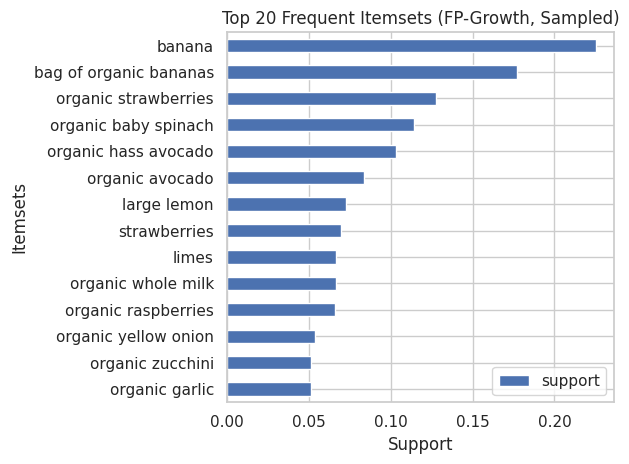

In [16]:
topN = 20
temp_fp = frequent_itemsets_fp.copy()
temp_fp['itemset_str'] = temp_fp['itemsets'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(10,6))
temp_fp.head(topN).plot(kind='barh', x='itemset_str', y='support')
plt.title(f"Top {topN} Frequent Itemsets (FP-Growth, Sampled)")
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [17]:
from mlxtend.frequent_patterns import association_rules
min_conf = 0.5  # adjust higher if too many rules

rules_ap = association_rules(
    frequent_itemsets_ap,
    metric="confidence",
    min_threshold=min_conf
)

rules_ap.head()
rules_ap = rules_ap[(rules_ap["support"] >= 0.03) & (rules_ap["lift"] >= 1.1)]
rules_ap = rules_ap.sort_values("lift", ascending=False)
rules_ap.head(10)
rules_fp = association_rules(
    frequent_itemsets_fp,
    metric="confidence",
    min_threshold=min_conf
)

rules_fp = rules_fp[["antecedents", "consequents", "support", "confidence", "lift"]]
rules_fp = rules_fp.sort_values("lift", ascending=False)
rules_fp.head(10)



,antecedents,consequents,support,confidence,lift


In [18]:
def fs_to_str(fs):
    return ", ".join(list(fs))

rules_ap_display = rules_ap.copy()
rules_ap_display["antecedents"] = rules_ap_display["antecedents"].apply(fs_to_str)
rules_ap_display["consequents"] = rules_ap_display["consequents"].apply(fs_to_str)

rules_fp_display = rules_fp.copy()
rules_fp_display["antecedents"] = rules_fp_display["antecedents"].apply(fs_to_str)
rules_fp_display["consequents"] = rules_fp_display["consequents"].apply(fs_to_str)

rules_ap_display.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


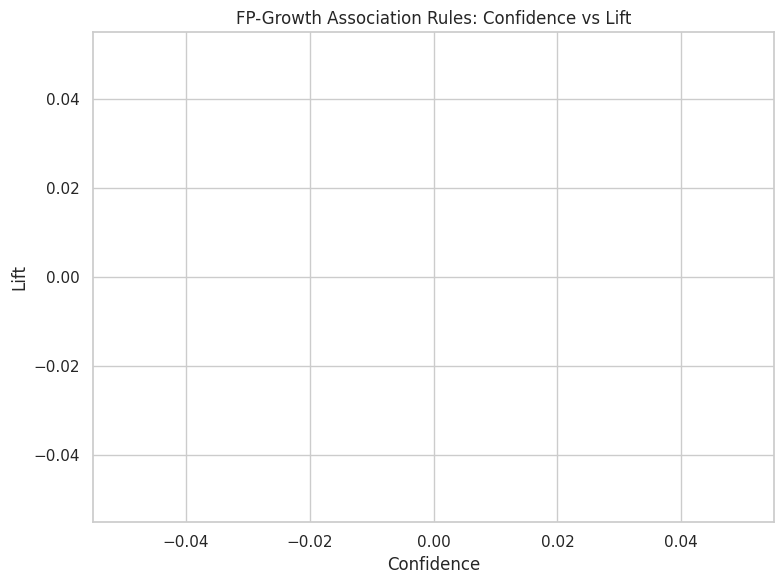

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=rules_fp,
    x="confidence",
    y="lift"
)
plt.title("FP-Growth Association Rules: Confidence vs Lift")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.tight_layout()
plt.show()



In [21]:
import time
from mlxtend.frequent_patterns import apriori, fpgrowth

# Ensure basket_sample and min_support are defined as before
try:
    basket_sample
    min_support
except NameError:
    basket_sample = basket_bool.sample(n=50_000, random_state=42)
    min_support = 0.05

# Time Apriori
start = time.time()
fi_ap = apriori(
    basket_sample,
    min_support=min_support,
    use_colnames=True,
    max_len=2
)
ap_time = time.time() - start

# Time FP-Growth
start = time.time()
fi_fp = fpgrowth(
    basket_sample,
    min_support=min_support,
    use_colnames=True,
    max_len=2
)
fp_time = time.time() - start

ap_time, fp_time


(0.032274484634399414, 0.18401765823364258)

In [22]:
len_fi_ap = len(fi_ap)
len_fi_fp = len(fi_fp)

len_fi_ap, len_fi_fp


(14, 14)

In [23]:
from mlxtend.frequent_patterns import association_rules

# Generate rules only from 2-item frequent sets
min_conf = 0.6   # HIGHER means fewer rules and safer

rules_ap2 = association_rules(
    fi_ap,
    metric="confidence",
    min_threshold=min_conf
)

rules_fp2 = association_rules(
    fi_fp,
    metric="confidence",
    min_threshold=min_conf
)

# Apply extra filtering so the dataset is manageable
rules_ap2 = rules_ap2[rules_ap2['lift'] > 1.1]
rules_fp2 = rules_fp2[rules_fp2['lift'] > 1.1]

len_rules_ap = len(rules_ap2)
len_rules_fp = len(rules_fp2)

len_rules_ap, len_rules_fp


(0, 0)